# Getting data from a Socrata API

Many governments use socrata as their platform to serve data to the public. The Socrata API allows direct and real-time access to open data.

https://github.com/xmunoz/sodapy

For this tutorial, we will use traffic collision data:

https://data.lacity.org/A-Safe-City/Traffic-Collision-Data-from-2010-to-Present/d5tf-ez2w


In [1]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.lacity.org", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.lacity.org,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("d5tf-ez2w", limit=2000,)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [2]:
len(results)

2000

In [3]:
# put it in a dataframe
results_df = pd.DataFrame.from_records(results)

In [4]:
results_df.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,crm_cd,crm_cd_desc,mocodes,...,premis_desc,location,cross_street,location_1,:@computed_region_qz3q_ghft,:@computed_region_k96s_3jcv,:@computed_region_tatf_ua23,:@computed_region_kqwf_mjcx,:@computed_region_2dna_qi2s,:@computed_region_ur2y_g4cx
0,190211527,2019-05-18T00:00:00.000,2019-05-18T00:00:00.000,0110,02,Rampart,0279,997,TRAFFIC COLLISION,3101 3401 3701 3004 3030,...,STREET,UNION,JAMES M WOOD,"{'latitude': '34.0508', 'longitude': '-118.273...",23076,576,1378,11,68,NaN
1,110518459,2011-10-11T00:00:00.000,2011-10-11T00:00:00.000,1735,05,Harbor,0505,997,TRAFFIC COLLISION,0506,...,STREET,VERMONT,KNOX,"{'latitude': '33.8542', 'longitude': '-118.290...",25716,944,798,NaN,NaN,NaN
2,180618348,2018-08-09T00:00:00.000,2018-08-09T00:00:00.000,1830,06,Hollywood,0665,997,TRAFFIC COLLISION,3004 3028 3030 3035 3036 3101 3401 3701 4006,...,STREET,FRANKLIN AV,ARGYLE,"{'latitude': '34.1052', 'longitude': '-118.325...",23446,417,485,8,64,NaN
3,120312271,2012-05-09T00:00:00.000,2012-05-09T00:00:00.000,0845,03,Southwest,0331,997,TRAFFIC COLLISION,NaN,...,STREET,LA BREA AV,JEFFERSON BL,"{'latitude': '34.0255', 'longitude': '-118.354...",23077,664,924,12,17,7
4,121215287,2012-06-13T00:00:00.000,2012-06-13T00:00:00.000,0745,12,77th Street,1208,997,TRAFFIC COLLISION,0605,...,STREET,48TH ST,FIGUEROA,"{'latitude': '33.9997', 'longitude': '-118.282...",23668,739,896,13,2,7


That's pretty random. You can use other arguments to filter down what you import. For example, get the last 2000 records and order it by date:
- `where`
- `order`

In [5]:
results = client.get("d5tf-ez2w", 
                     limit = 2000,
                     order = "date_rptd desc")

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [6]:
results_df.sample()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,crm_cd,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_cd,premis_desc,location,cross_street,location_1,mocodes
1073,201216776,2020-07-20T00:00:00.000,2020-07-20T00:00:00.000,1530,12,77th Street,1267,997,TRAFFIC COLLISION,25,M,A,101,STREET,MANCHESTER,DENVER,"{'latitude': '33.9601', 'longitude': '-118.283...",4025 3036 3004 3028 3030 3101


## Make some simple plots

Create a subset of the database.

https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html

In [7]:
import plotly.express as px

df = results_df[["date_rptd","vict_descent"]]
df

,date_rptd,vict_descent
0,2020-08-01T00:00:00.000,B
1,2020-08-01T00:00:00.000,W
2,2020-08-01T00:00:00.000,B
3,2020-08-01T00:00:00.000,H
4,2020-08-01T00:00:00.000,H
...,...,...
1995,2020-07-12T00:00:00.000,O
1996,2020-07-12T00:00:00.000,H
1997,2020-07-12T00:00:00.000,X
1998,2020-07-12T00:00:00.000,X


In [40]:
# let's find: how many incidents per day per ethnic group?
group1 = df.groupby(['date_rptd','vict_descent'], as_index=False).size()
group1

date_rptd                vict_descent
2020-07-11T00:00:00.000  H                1
2020-07-12T00:00:00.000  A                1
                         B               18
                         F                1
                         H               53
                                         ..
2020-08-01T00:00:00.000  B                5
                         H               10
                         O                3
                         W                4
                         X                1
Length: 160, dtype: int64

In [41]:
# how to chart?

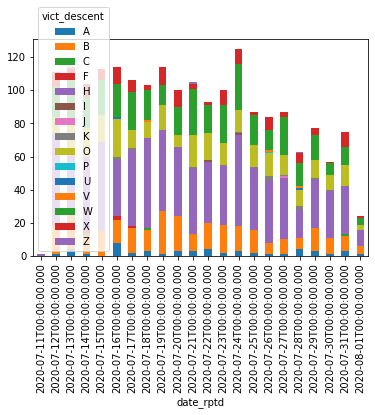

In [42]:
group1.unstack(level=1).plot(kind='bar',stacked=True)

In [13]:
datesdata = group1.unstack(level=1)
datesdata


vict_descent,A,B,C,F,H,I,J,K,O,P,U,V,W,X,Z
date_rptd,,,,,,,,,,,,,,,
2020-07-11T00:00:00.000,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-12T00:00:00.000,1.0,18.0,NaN,1.0,53.0,NaN,NaN,1.0,10.0,NaN,NaN,NaN,18.0,9.0,NaN
2020-07-13T00:00:00.000,4.0,20.0,NaN,NaN,39.0,1.0,NaN,1.0,18.0,NaN,NaN,NaN,23.0,7.0,1.0
2020-07-14T00:00:00.000,1.0,11.0,1.0,3.0,43.0,NaN,NaN,1.0,17.0,1.0,NaN,NaN,18.0,8.0,NaN
2020-07-15T00:00:00.000,NaN,15.0,NaN,NaN,53.0,NaN,NaN,1.0,16.0,NaN,NaN,NaN,21.0,7.0,NaN
2020-07-16T00:00:00.000,8.0,14.0,NaN,2.0,34.0,NaN,NaN,2.0,23.0,NaN,1.0,NaN,20.0,10.0,NaN
2020-07-17T00:00:00.000,2.0,15.0,NaN,1.0,46.0,NaN,NaN,1.0,11.0,NaN,NaN,NaN,23.0,7.0,NaN
2020-07-18T00:00:00.000,3.0,13.0,1.0,NaN,54.0,NaN,NaN,NaN,10.0,NaN,NaN,1.0,18.0,3.0,NaN
2020-07-19T00:00:00.000,1.0,26.0,NaN,NaN,49.0,NaN,NaN,NaN,15.0,NaN,NaN,NaN,12.0,11.0,NaN


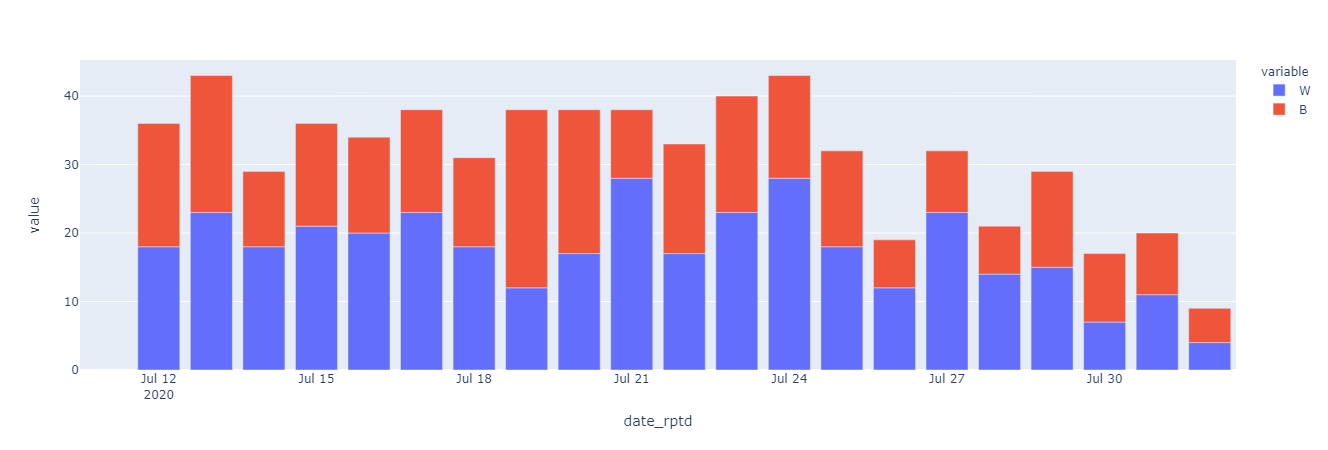

In [17]:
px.bar(datesdata,x=datesdata.index,y=['W','B'])

In [ ]:
import plotly
plotly.__version__

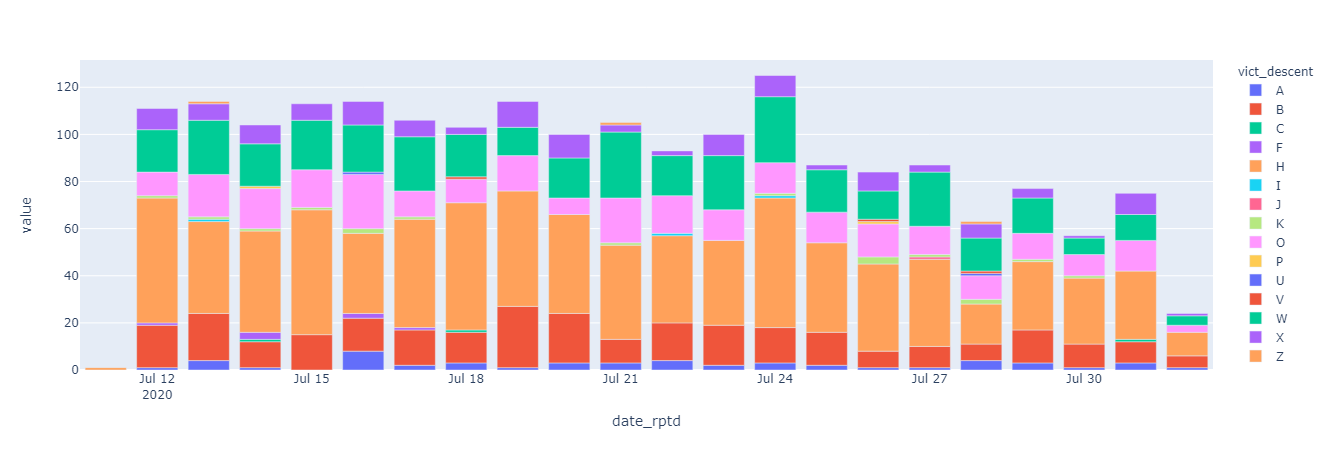

In [15]:
px.bar(group1.unstack(level=1))

# Mapping

In [35]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   dr_no         2000 non-null   object
 1   date_rptd     2000 non-null   object
 2   date_occ      2000 non-null   object
 3   time_occ      2000 non-null   object
 4   area          2000 non-null   object
 5   area_name     2000 non-null   object
 6   rpt_dist_no   2000 non-null   object
 7   crm_cd        2000 non-null   object
 8   crm_cd_desc   2000 non-null   object
 9   vict_age      1890 non-null   object
 10  vict_sex      1957 non-null   object
 11  vict_descent  1957 non-null   object
 12  premis_cd     2000 non-null   object
 13  premis_desc   2000 non-null   object
 14  location      2000 non-null   object
 15  cross_street  1854 non-null   object
 16  location_1    2000 non-null   object
 17  mocodes       1575 non-null   object
dtypes: object(18)
memory usage: 281.4+ KB


In [39]:
results_df.location_1['latitude']

KeyError: 'latitude'